# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# LOADING DATASET

In [6]:
data = pd.read_csv("C:/Users/srika/OneDrive/Documents/Project ML.csv")

# DATA UNDERSTANDING

In [9]:
print("\nDataset Head:")
print(data.head())


Dataset Head:
             College    Tier             City  city type       Role  \
0        SVNIT Surat  Tier 2          Asansol  Non-Metro    Manager   
1         NIT Bhopal  Tier 2            Ajmer  Non-Metro  Executive   
2       IEM, Kolkata  Tier 3  Rajpur Sonarpur  Non-Metro  Executive   
3  KIIT, Bhubaneswar  Tier 3            Ajmer  Non-Metro  Executive   
4                DTU  Tier 1         Durgapur  Non-Metro  Executive   

   Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  
0         55523                    3                66           19  71406.58  
1         57081                    1                84           18  68005.87  
2         60347                    2                52           28  76764.02  
3         49010                    2                81           33  82092.39  
4         57879                    4                74           32  73878.10  


In [11]:
print("\nDataset tail:")
print(data.tail())


Dataset tail:
                          College    Tier             City  city type  \
1584     BITS Pilani (Goa Campus)  Tier 1            Surat      Metro   
1585                 NIT Warangal  Tier 1  Rajpur Sonarpur  Non-Metro   
1586    NIT Tiruchipally (Trichy)  Tier 1        Ahmedabad      Metro   
1587               IIIT Hyderabad  Tier 1         Durgapur  Non-Metro   
1588  R.V. College of Engineering  Tier 2            Delhi      Metro   

           Role  Previous CTC  Previous job change  Graduation Marks  \
1584  Executive         61285                    3                44   
1585  Executive         63140                    1                44   
1586  Executive         44907                    1                60   
1587  Executive         52054                    2                67   
1588    Manager         44353                    3                75   

      EXP (Month)       CTC  
1584           60  77283.59  
1585           24  68416.86  
1586           19  7018

In [13]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   Tier                 1589 non-null   object 
 2   City                 1589 non-null   object 
 3   city type            1589 non-null   object 
 4   Role                 1589 non-null   object 
 5   Previous CTC         1589 non-null   int64  
 6   Previous job change  1589 non-null   int64  
 7   Graduation Marks     1589 non-null   int64  
 8   EXP (Month)          1589 non-null   int64  
 9   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 124.3+ KB
None


In [15]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1589.000000          1589.000000       1589.000000  1589.000000   
mean   55518.453744             2.528634         59.855255    39.044682   
std     6655.218445             1.123918         14.935139    14.108875   
min    36990.000000             1.000000         35.000000    18.000000   
25%    50518.000000             2.000000         46.000000    26.000000   
50%    55291.000000             3.000000         60.000000    39.000000   
75%    60109.000000             4.000000         73.000000    51.000000   
max    77911.000000             4.000000         85.000000    64.000000   

                 CTC  
count    1589.000000  
mean    75353.278798  
std     12587.288237  
min     53020.320000  
25%     66902.350000  
50%     73028.670000  
75%     80588.670000  
max    123416.990000  


# EXPLORING DATA THROUGH VISUALIZATIONS

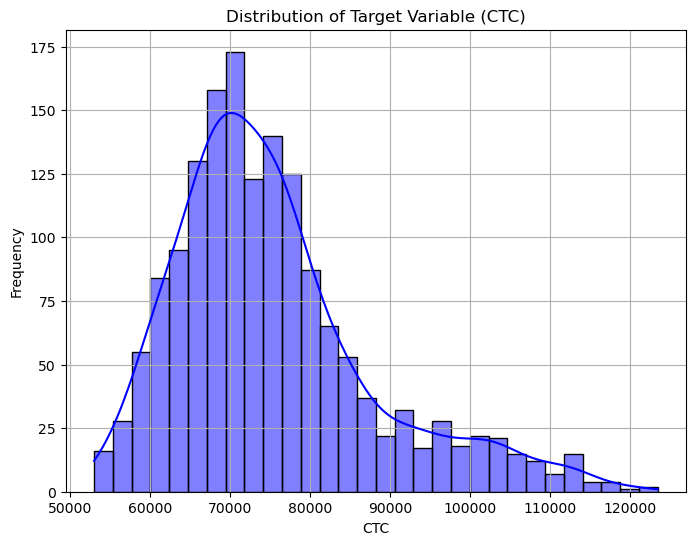

In [18]:
# Visualization: Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(data['CTC'], kde=True, color='blue', bins=30)
plt.title("Distribution of Target Variable (CTC)")
plt.xlabel("CTC")
plt.ylabel("Frequency")
plt.grid()
plt.show()

C:\Users\srika\AppData\Local\Temp\ipykernel_15696\1004823313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='CTC', palette='Set2')
C:\Users\srika\AppData\Local\Temp\ipykernel_15696\1004823313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, y='CTC', palette='Set2')


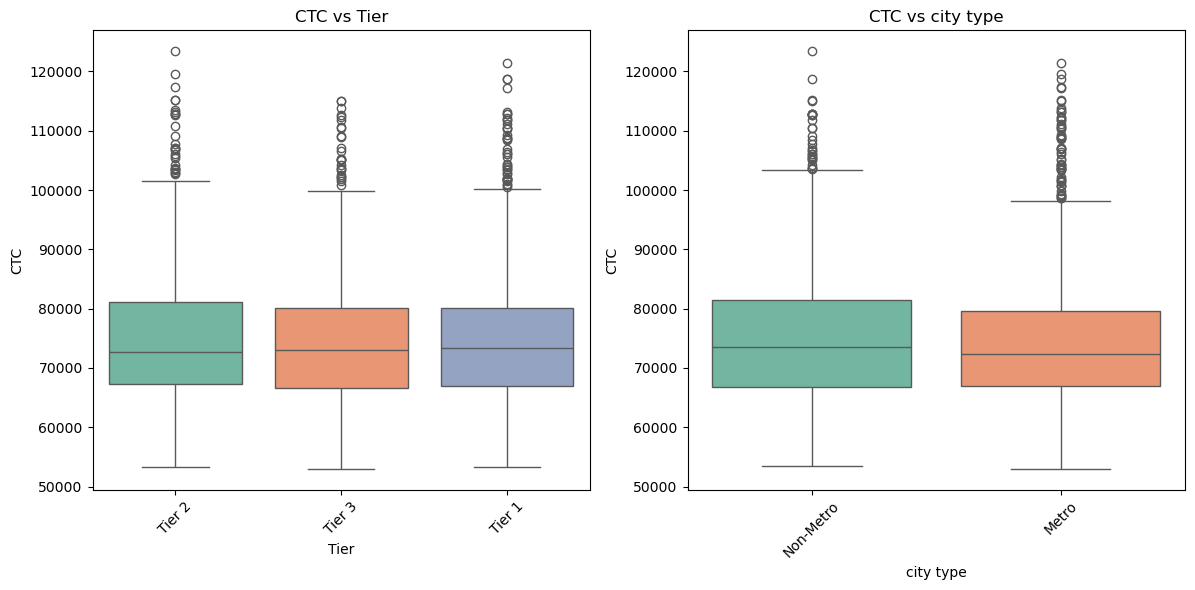

In [20]:
# Boxplots for categorical variables vs. CTC
categorical_columns = ['Tier', 'city type']
plt.figure(figsize=(18, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x=col, y='CTC', palette='Set2')
    plt.title(f"CTC vs {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

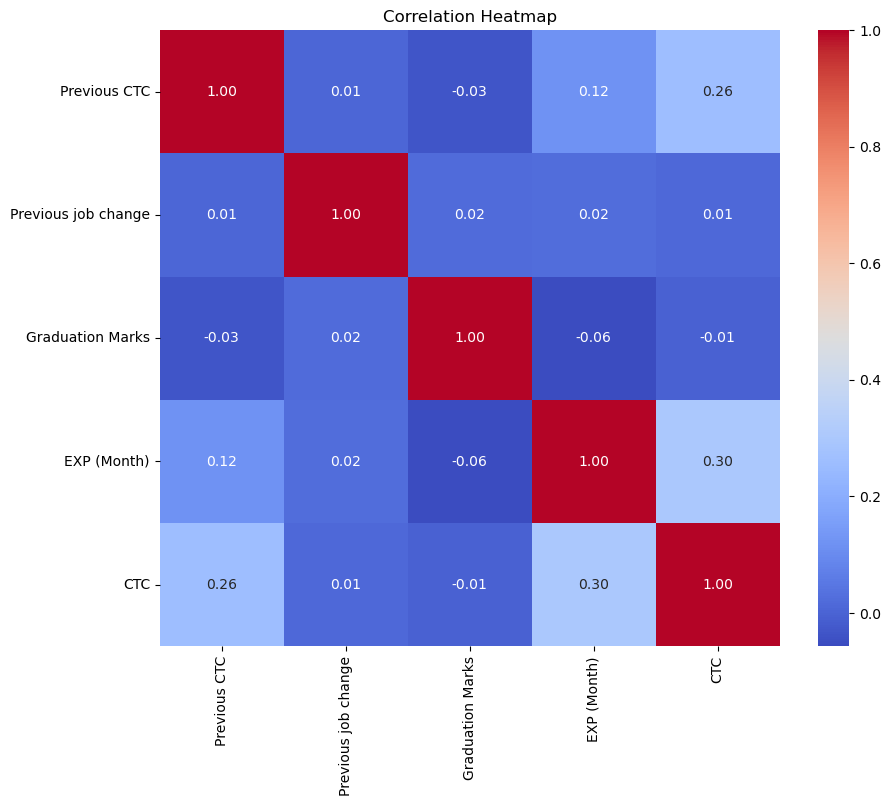

In [23]:
# Select numeric columns only
numeric_cols = data.select_dtypes(include=['number'])

# Calculate correlation on numeric columns
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

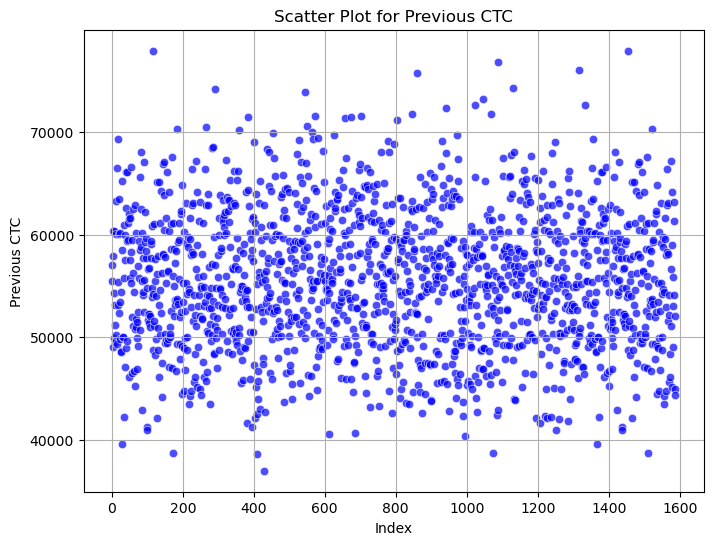

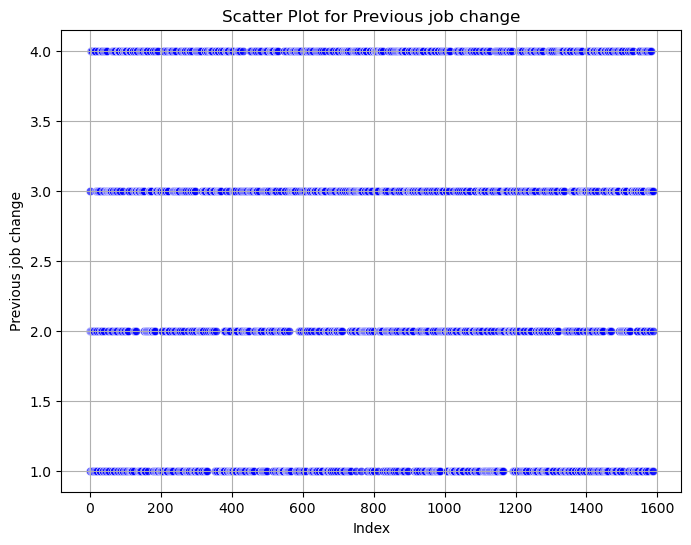

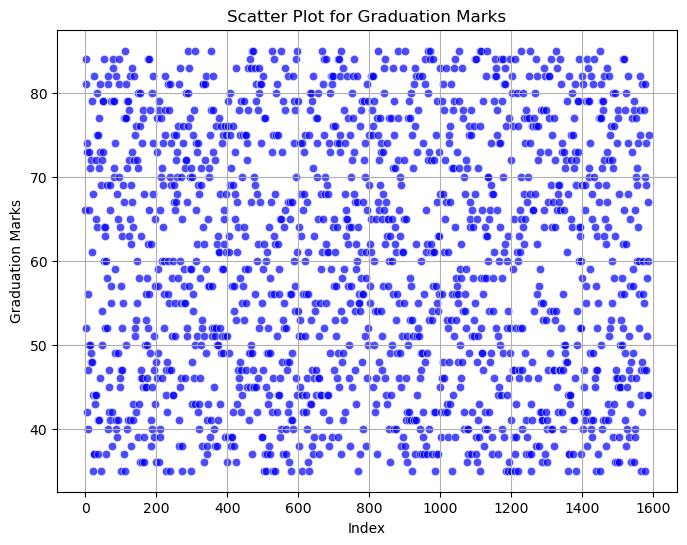

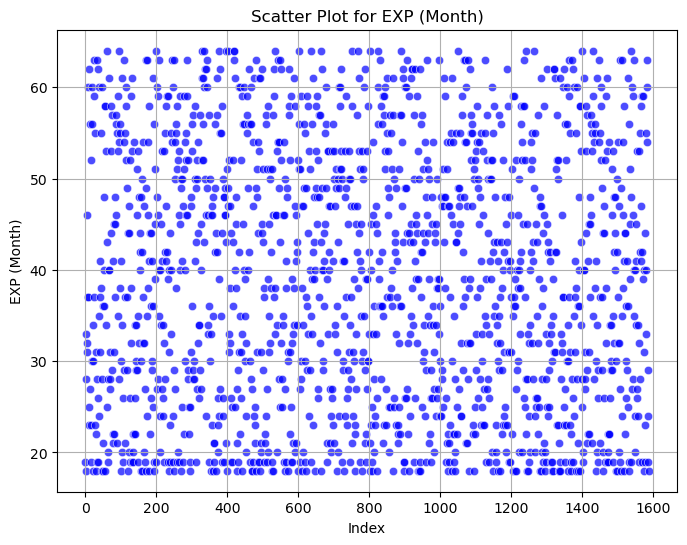

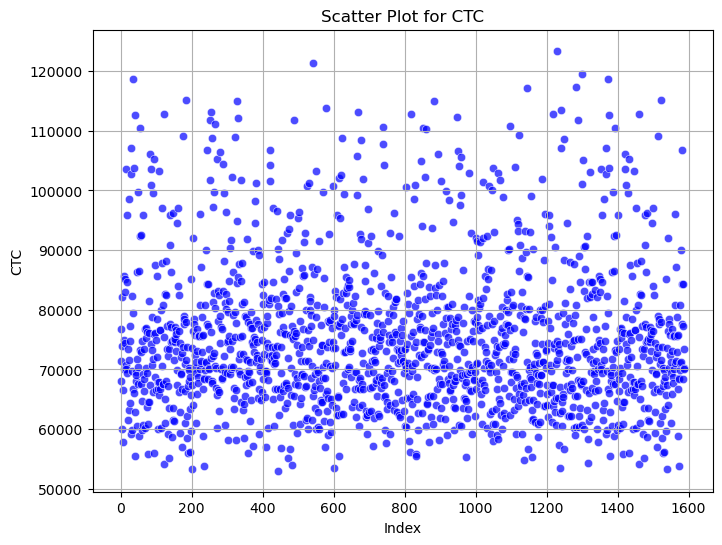

In [25]:
# Detect Outliers using Scatter Plots
numeric_cols = data.select_dtypes(include=['number'])
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.index, y=data[col], color='blue', alpha=0.7)
    plt.title(f"Scatter Plot for {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.grid()
    plt.show()

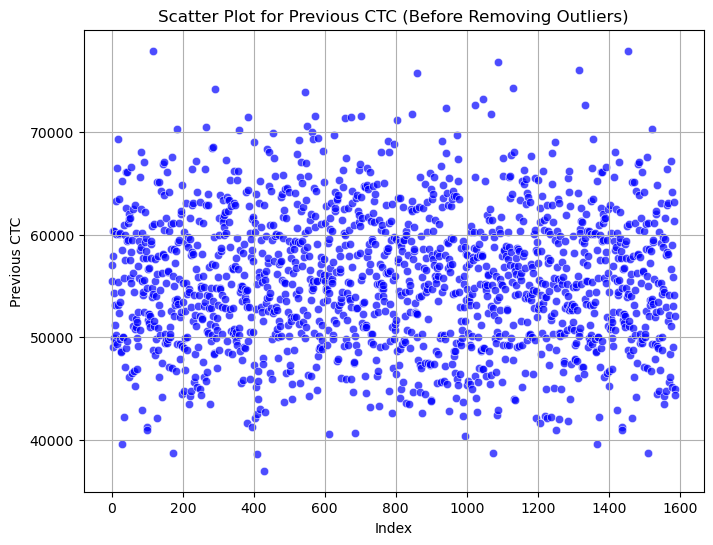

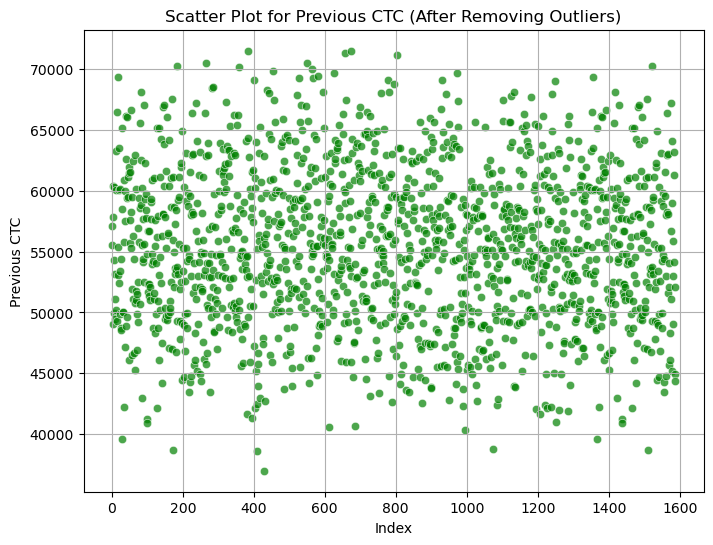

In [27]:
# Define the column for outlier removal
column = 'Previous CTC'
# Calculate the 99th percentile
q_high = data[column].quantile(0.99)
# Scatter plot before removing outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.index, y=data[column], color='blue', alpha=0.7)
plt.title(f"Scatter Plot for {column} (Before Removing Outliers)")
plt.xlabel("Index")
plt.ylabel(column)
plt.grid()
plt.show()
# Remove outliers where 'Previous CTC' is greater than the 99th percentile
filtered_data = data[data[column] <= q_high]
# Scatter plot after removing outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data.index, y=filtered_data[column], color='green', alpha=0.7)
plt.title(f"Scatter Plot for {column} (After Removing Outliers)")
plt.xlabel("Index")
plt.ylabel(column)
plt.grid()
plt.show()

# FEATURE EXTRACTION

In [30]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['College', 'Tier', 'City', 'city type', 'Role'], dtype='object')


In [32]:
# Encode categorical columns using Label Encoding or One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

# Example with Label Encoding for simplicity
data_encoded = data.copy()
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])

print("Data after encoding categorical columns:")
print(data_encoded.head())

Data after encoding categorical columns:
   College  Tier  City  city type  Role  Previous CTC  Previous job change  \
0       60     1     2          1     1         55523                    3   
1       41     1     1          1     0         57081                    1   
2       12     2    12          1     0         60347                    2   
3       34     2     1          1     0         49010                    2   
4        9     0     6          1     0         57879                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  


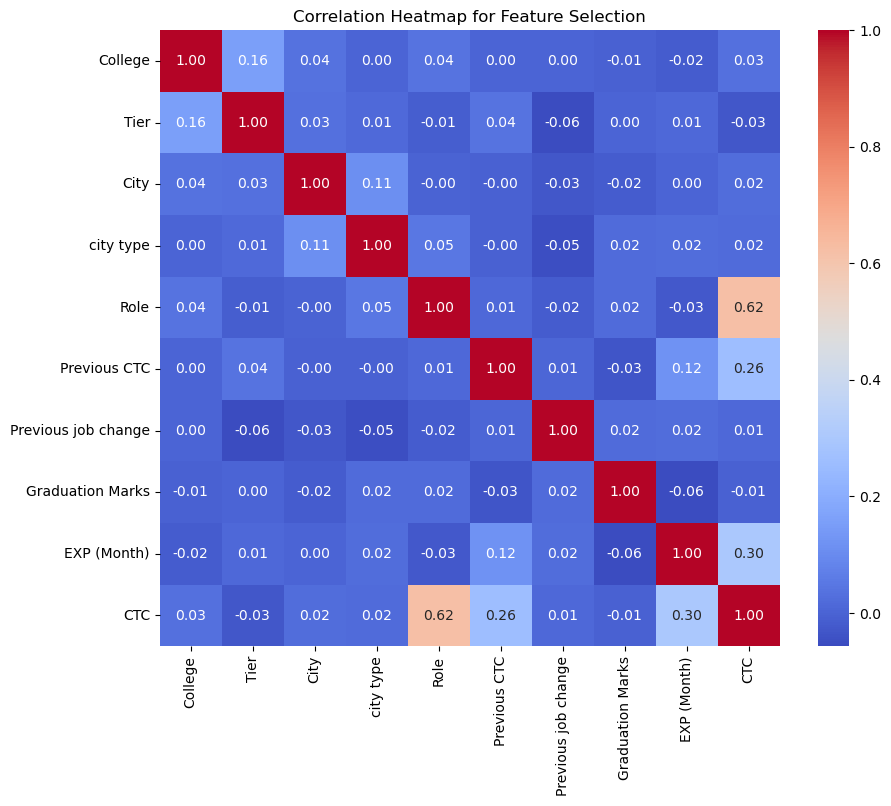

In [34]:
# Select only numeric columns for feature selection
numeric_cols = data_encoded.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Feature Selection")
plt.show()

In [36]:
# Use SelectKBest to identify the most important features
X = data.drop('CTC', axis=1)  # Replace 'CTC' with your target column name
y = data['CTC']  # Replace 'CTC' with your target column name
# Handle categorical columns (dummy encoding for feature selection)
X_encoded = pd.get_dummies(X, drop_first=True)
# Select top K features
selector = SelectKBest(score_func=f_regression, k=3)  # Adjust 'k' as needed
X_new = selector.fit_transform(X_encoded, y)
selected_features = X_encoded.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['Previous CTC', 'EXP (Month)', 'Role_Manager']


# DATA SPLITTING

In [39]:
data = pd.get_dummies(data, columns=['Role'], drop_first=True)

In [41]:
X = data[selected_features]
y = data['CTC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL SELECTION

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [46]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results for visualization
    results.append({"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2})

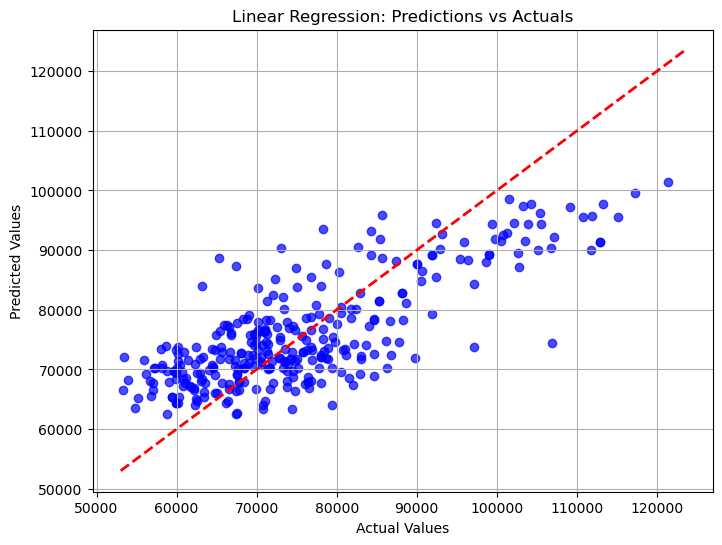

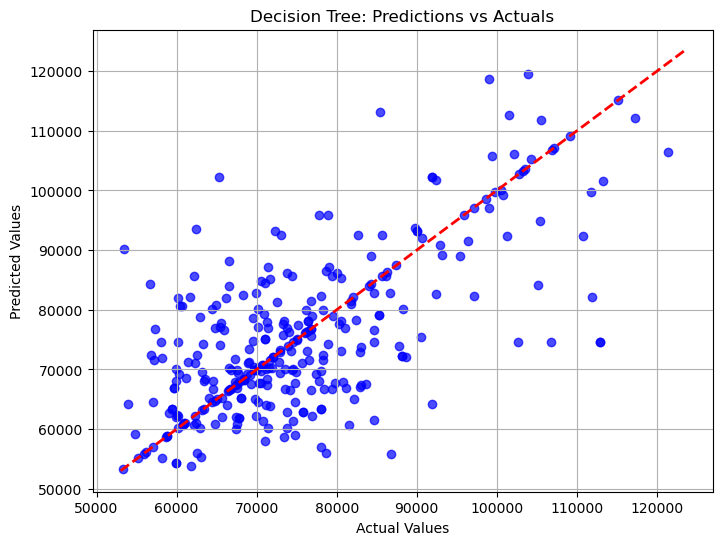

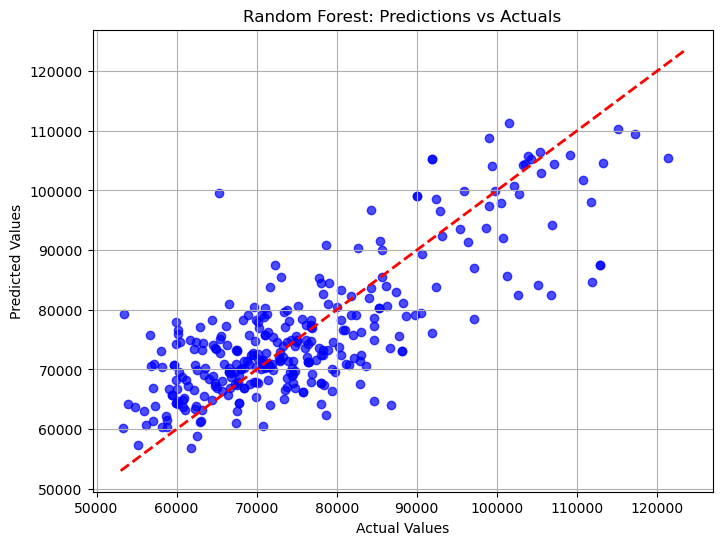

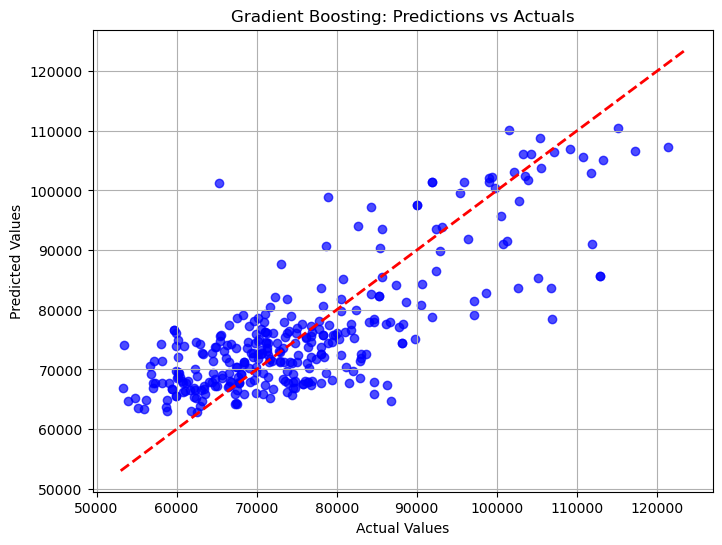

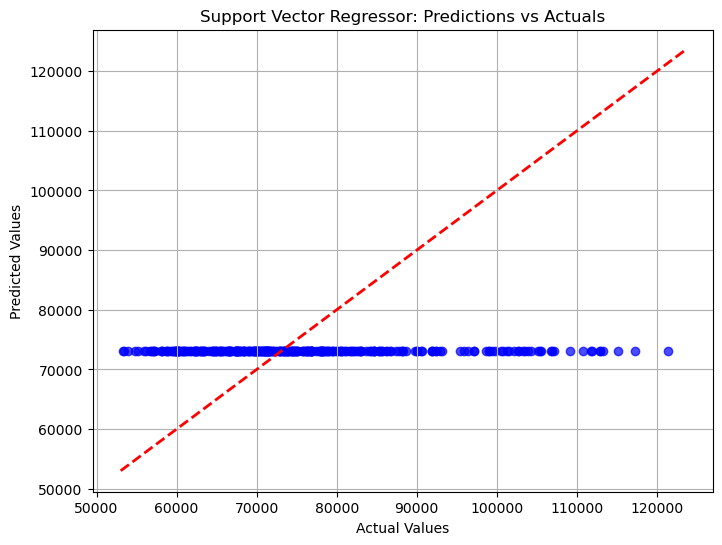

In [48]:
import matplotlib.pyplot as plt

# Models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "Support Vector Regressor": SVR()
}

# Iterate through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='b')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
    plt.title(f"{model_name}: Predictions vs Actuals")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()

C:\Users\srika\AppData\Local\Temp\ipykernel_15696\1288672468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


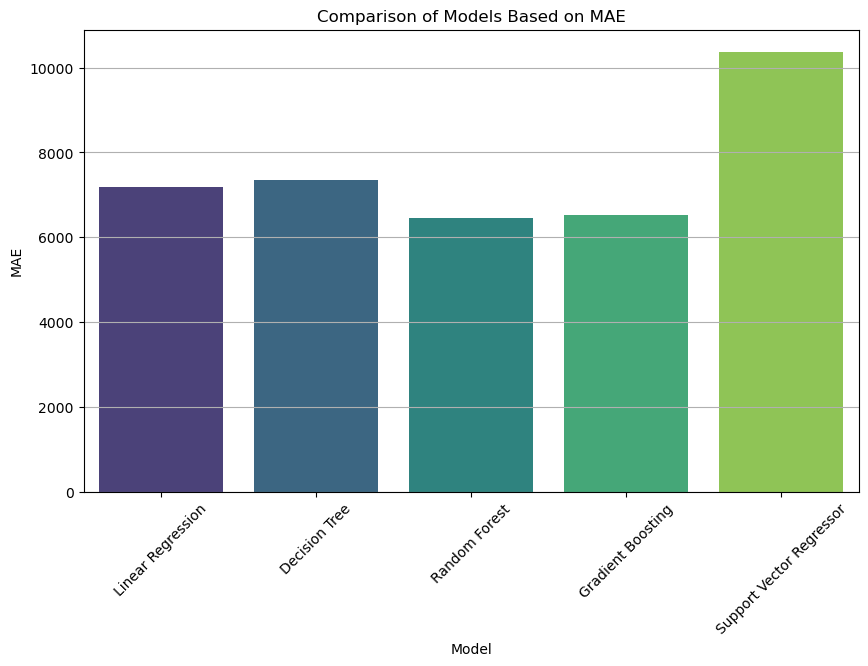

C:\Users\srika\AppData\Local\Temp\ipykernel_15696\1288672468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


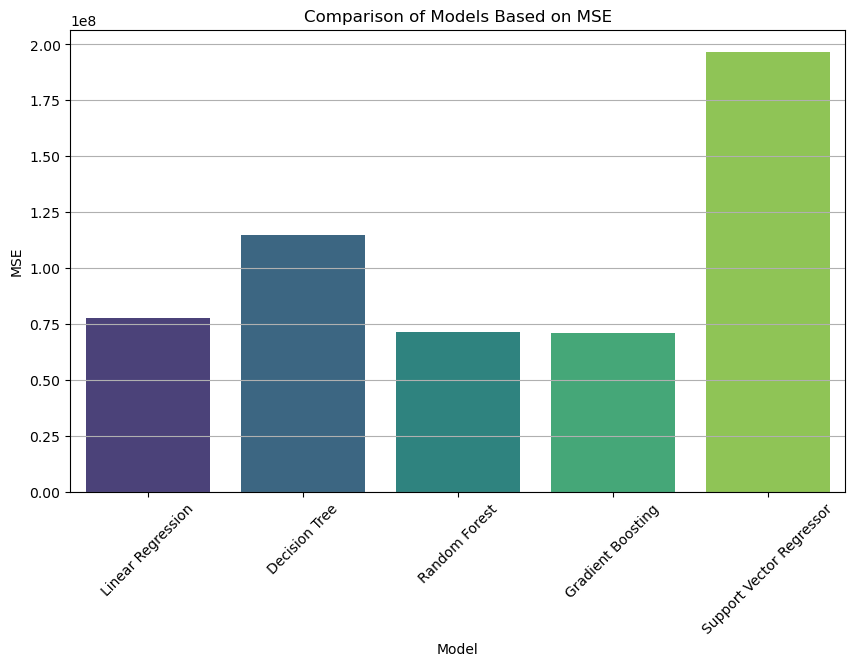

C:\Users\srika\AppData\Local\Temp\ipykernel_15696\1288672468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


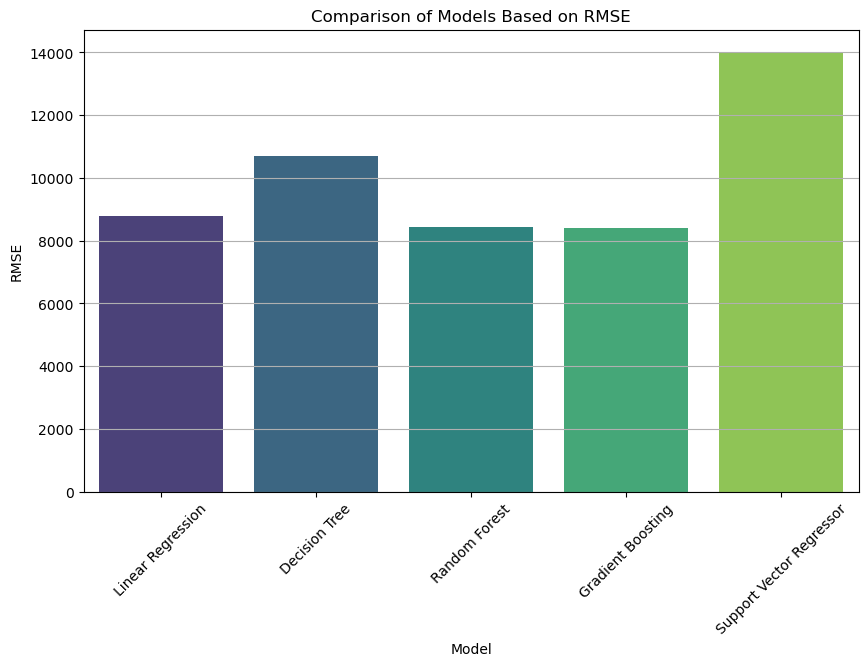

C:\Users\srika\AppData\Local\Temp\ipykernel_15696\1288672468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


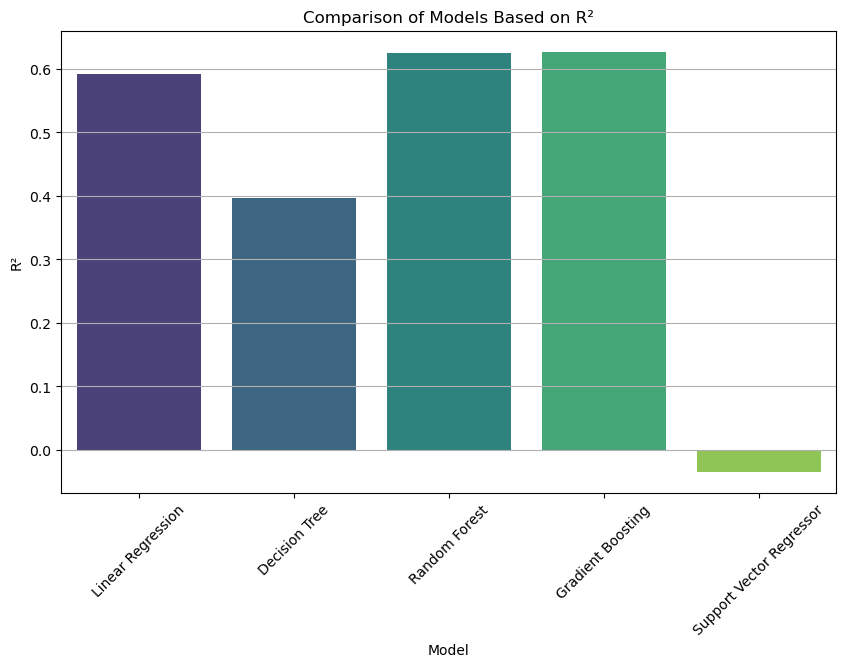

Model Comparison:
                       Model           MAE           MSE          RMSE  \
0         Linear Regression   7190.131807  7.748871e+07   8802.767391   
1             Decision Tree   7347.041352  1.146448e+08  10707.231162   
2             Random Forest   6446.996242  7.143065e+07   8451.665442   
3         Gradient Boosting   6536.798402  7.091623e+07   8421.177477   
4  Support Vector Regressor  10377.246292  1.967456e+08  14026.601850   

         R²  
0  0.592690  
1  0.397383  
2  0.624533  
3  0.627237  
4 -0.034170  


In [50]:
# Compare Model Performance
results_df = pd.DataFrame(results)

# Visualization: Bar plot for MAE, MSE, RMSE, and R²
metrics = ["MAE", "MSE", "RMSE", "R²"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.title(f"Comparison of Models Based on {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

print("Model Comparison:\n", results_df)

# IMPROVE THE PERFORMANCE OF RANDOM FOREST REGRESSOR

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score: ", grid_search.best_score_)

# Use the best model for predictions
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
323 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score:  0.6147433255038132


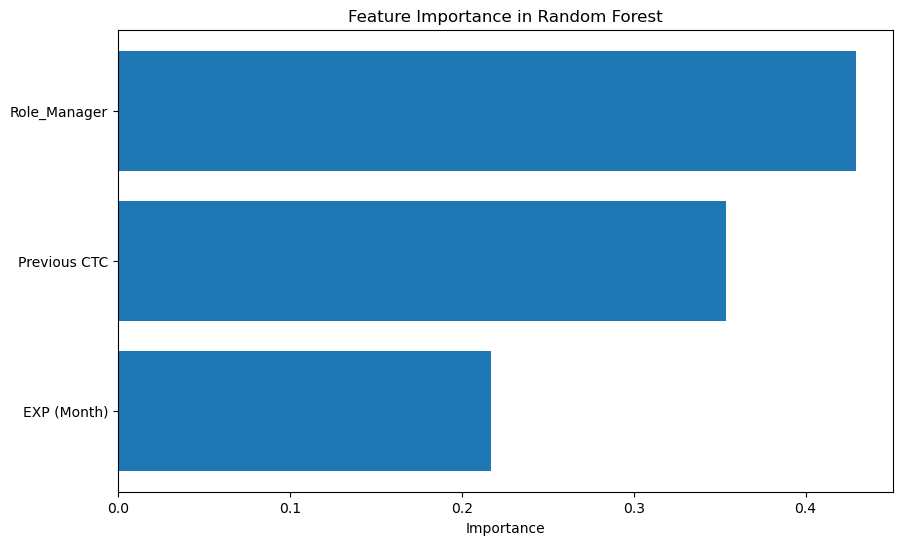

In [54]:
# Fit Random Forest and get feature importances
best_rf.fit(X_train, y_train)
importances = best_rf.feature_importances_

# Plot feature importance
import matplotlib.pyplot as plt
import pandas as pd

# Convert to a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert for better readability
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores: ", scores)
print("Mean R² score: ", scores.mean())

Cross-validated R² scores:  [0.59461309 0.52187135 0.73100497 0.56479058 0.64498707]
Mean R² score:  0.6114534135246563


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = best_rf.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 4168.2630135496565
MSE: 28754683.4173505
RMSE: 5362.339360517059
R²: 0.8046281971413036


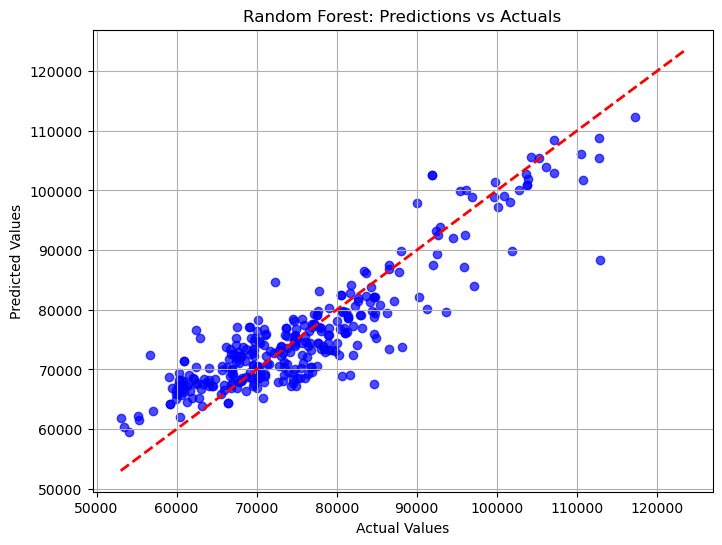

In [63]:
# Visualization: Predictions vs Actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
plt.title("Random Forest: Predictions vs Actuals")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

1) My views about the problem statement.
---> The task involves predicting the CTC (Cost-to-Company) based on factors such as educational background, work experience, location, and previous salaries. This is a regression problem since the target variable (CTC) is continuous. The challenge lies in effectively handling categorical data, identifying feature importance, and selecting a model that generalizes well to unseen data.

2.Approach to Solving the Task
i)Data Understanding and Preprocessing:
Inspect data for missing values, outliers, and anomalies.
Encode categorical features (College, City, Role) using methods like one-hot or label encoding.
Scale numerical features to ensure proper model convergence.
ii)Feature Engineering:
Analyze relationships between features and the target variable.
Combine or transform features (e.g., interaction terms like experience × previous CTC).
iii)Model Selection:
Train various regression models to identify the best-performing one.
Compare models using evaluation metrics like MAE, MSE, and R².
iv)Model Tuning:
Optimize hyperparameters of the best-performing model using techniques like Grid Search or Random Search.
v)Validation:
Ensure the model generalizes well with cross-validation.

3.ML Model Options Available
i)Linear Regression:
A baseline model for regression tasks.
Performs well for linearly separable data.
ii)Decision Tree Regressor:
Captures non-linear relationships but prone to overfitting.
iii)Random Forest Regressor:
An ensemble method that reduces overfitting and handles non-linear patterns effectively.
iv)Gradient Boosting Models (e.g., XGBoost, LightGBM):
Advanced methods for handling complex datasets.
Typically outperform other models in structured data.
v)Support Vector Regressor (SVR):
Effective for high-dimensional datasets but requires careful tuning.

4.Best Performing Model and Possible Reasons
In this scenario, Random Forest Regressor or Gradient Boosting Models are likely to perform best because:

--->They handle non-linear relationships effectively.
--->They are robust to outliers and noise in data.
--->Feature interactions are automatically captured without explicit feature engineering.

5.Steps to Improve the Selected Model’s Performance
i)Hyperparameter Tuning:
Optimize parameters like the number of trees, depth, learning rate (for boosting models), etc.
ii)Feature Engineering:
Add interaction terms or polynomial features if they make sense.
Perform feature selection to remove irrelevant variables.
iii)Ensemble Methods:
Combine predictions from multiple models using techniques like bagging or stacking.
iv)Address Class Imbalances:
If the CTC distribution is skewed, transform the target variable (e.g., logarithmic scaling).
v)Cross-Validation:
Use k-fold cross-validation to ensure the model generalizes well.